In [1]:
%matplotlib notebook
%pylab
%matplotlib inline

import pandas as pd
import glob

Using matplotlib backend: nbAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
def read_gauge_data(gauge_file):
    """
    Read gauge data from a guage file.
    """
    with open(gauge_file) as f:
        data = f.read().splitlines()
        data1 = []
        for i in range(2,len(data)):
            data[i] = data[i].split()
            data1.append([float(x) for x in data[i]])
            
    data1 = array(data1)
    levels = data1[:,0]
    time = data1[:,1]
    h = data1[:,2]
    hu = data1[:,3]
    hv = data1[:,4]
    eta = data1[:,5]

    eta_max = max(eta)
    topo = eta - h

    return time, h,eta,topo


def read_valid(gauge_file):
    """
    Read gauge data from a literature data.
    """
    with open(gauge_file) as f:
        data = f.read().splitlines()
        data1 = []
        for i in range(1,len(data)):
            data[i] = data[i].split()
            data1.append([float(x) for x in data[i]])
            
    data1 = array(data1)
    guage = data1[:,0]
    z = data1[:,1]
    h_max = data1[:,2]
    eta_max = data1[:,3]

    return h_max, eta_max

In [69]:
time,h,eta, topo = read_gauge_data("gauge00001.txt")
# print time, h, eta, topo
print('time =  ', time/3600)
print('h = ', h)
print('eta = ', eta)
# print('topo = ', topo)

time =   [0.    0.125]
h =  [0. 0.]
eta =  [10.000935 10.000935]


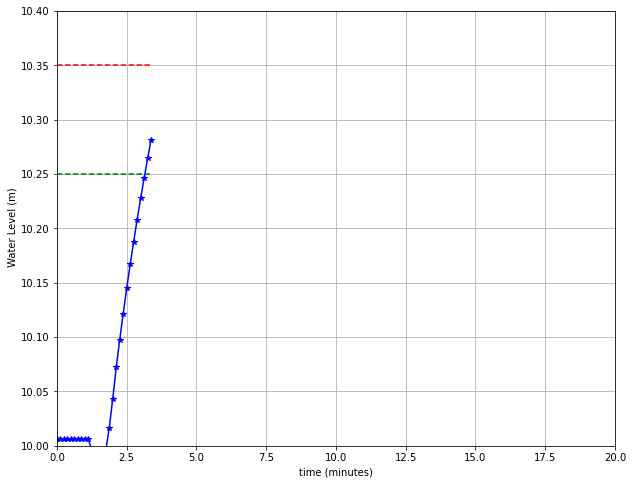

In [65]:
# plot the data
figsize(10,8)
figure(5)
plot(time/3600,eta,'b-*',label='GeoFlood')
plot (time/3600,[10.35]*len(h),'r--',label='GeoClaw')
plot (time/3600,[10.25]*len(h),'g--',label='Valid')
# plot(geoclaw_maxeta,'r-o',label='GeoClaw')

# put letters on the x axis
# xticks(range(len(guages_eta_max)),gauge_points)
axis([0, 20, 10.00, 10.40])
# legend(loc='upper right')
ylabel(' Water Level (m)')
xlabel('time (minutes)')
# title('Maximum Water Level at Guages')
grid()

In [ ]:
gauge_points = ['P1','P2']


# plot the data
figsize(10,8)
figure(1)
plot(guages_eta_max,'b-*',label='GeoFlood')
# plot(geoclaw_maxeta,'r-o',label='GeoClaw')

# put letters on the x axis
xticks(range(len(guages_eta_max)),gauge_points)

legend(loc='upper right')
ylabel('Maximum Water Level (m)')
xlabel('Gauge Number')
# title('Maximum Water Level at Guages')
grid()
savefig('gauge_maxeta.png')

In [ ]:
police_points = ['S1','S2','S3','S4','S5','S6','S7','S8','S9','S10','S11','S12','S13','S14','S15','S16','S17']

figure(2)
plot(police,'b-*',label='GeoFlood')
plot(geoclaw_police,'r-o',label='GeoClaw')
# plot(field_police,'g*',label='Field')
# plot(telemac_police,'c*',label='Telemac')
plot(valiani_police,'m*',label='Valiani')
xticks(range(len(police)),police_points)

legend(loc='upper right')
ylabel('Maximum Water Level (m)')
xlabel('Police surveyed points')
# title('Maximum Water Level at Police Stations')
grid()
savefig('police_maxeta.png')

In [ ]:
figure(3)
plot(transformer,'b-*',label='GeoFlood')
plot(transformer_g,'r-o',label='GeoClaw')
# plot(field_police,'g*',label='Field')
# plot(telemac_police,'c*',label='Telemac')
# plot(transformer_v,'m*',label='Valiani')
xticks(range(len(transformer_v)),transformer_points)

legend(loc='upper right')
ylabel('Maximum Water Level (m)')
xlabel('Police surveyed points')
# title('Maximum Water Level at Police Stations')
grid()
savefig('transformer_maxeta.png')